jupyter nbconvert project5_part2_Explenation.ipynb --to slides --post serve --template output_toggle

# Bicycle trips and relationships between them

# Investigation Overview
### In this investigation, I wanted to study the style of cycling and try to explore the relationships between its characteristics.
### The main focus was on the four Cs of the cycling trips: duration, Distance, speed,and the characteristics of members,and whether the bike trips affected by the time or not.



# Dataset Overview
### The dataset consists of information about members,duration of bike trips,and the area in which the member has started driving and ended, the dataset is large, it contains five thousand rows.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline

In [3]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
bike = pd.read_csv('2017-fordgobike-tripdata.csv')

In [5]:
bike.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [6]:
#Calculate Distance Between Coordinates.
# code reference:https://stackoverflow.com/questions/33029396/using-pandas-to-calculate-distance-between-coordinates-from-imported-csv

def dist_from_coordinates(start_station_latitude, start_station_longitude,end_station_latitude, end_station_longitude):
    R = 6371  # Earth radius in km

    #conversion to radians
    d_lat = np.radians(end_station_latitude-start_station_latitude)
    d_lon = np.radians(end_station_longitude-start_station_longitude)

    r_lat1 = np.radians(start_station_latitude)
    r_lat2 = np.radians(end_station_latitude)

    #haversine formula
    a = np.sin(d_lat/2.) **2 + np.cos(r_lat1) * np.cos(r_lat2) * np.sin(d_lon/2.)**2

    haversine = 2 * R * np.arcsin(np.sqrt(a))

    return haversine

new_column = []      #empty column for distance
for index,row in bike.iterrows():
    start_station_latitude = row['start_station_latitude'] #first row of location.latitude column here
    start_station_longitude = row['start_station_longitude'] #first row of location.longitude column here
    end_station_latitude = row['end_station_latitude'] #second row of location.latitude column here
    end_station_longitude = row['end_station_longitude'] #second row of location.longitude column here
    value = dist_from_coordinates(start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude)  #get the distance
    new_column.append(value)   #append the empty list with distance values

bike.insert(1,"Distance_KM",new_column)


In [7]:
#in case i run the calculater twice
#bike.drop(['Distance_KM','Distance_M'],axis=1,inplace=True)

In [8]:
bike['Distance_M']=bike['Distance_KM']*1000

In [9]:
bike['duration_min']=bike['duration_sec']/60

In [10]:
bike['speed_m/s']=bike['Distance_M']/bike['duration_sec']

In [11]:
# drop the row that contain nulls
bike.dropna(inplace=True)

In [12]:
# drop the row that contain duplicates
bike.drop_duplicates(inplace=True)

In [13]:
#convert ['end_time'] to datetime
bike.end_time = pd.to_datetime(bike.end_time)

In [14]:
#convert ['start_time'] to datetime
bike.start_time = pd.to_datetime(bike.start_time)

In [15]:
#create a column for day of the week(start)
bike['day_of_week_start'] = bike['start_time'].dt.weekday_name

In [16]:
#create a column for day of the week(end)
bike['day_of_week_end'] = bike['end_time'].dt.weekday_name

In [17]:
#convert ['member_birth_year'] to int
bike.member_birth_year = bike.member_birth_year.astype(int)

In [18]:
#convert ['duration_min'] to int
bike.duration_min = bike.duration_min.astype(int)

In [19]:
bike['member_age'] = 2017 - bike['member_birth_year']

In [20]:
#sprate start time to year,month,day
bike['start_Year'] = bike['start_time'].dt.year

In [21]:
bike['start_Month'] = bike['start_time'].dt.month

In [22]:
bike['start_Day'] = bike['start_time'].dt.day

In [23]:
#sprate start time to year,month,day
bike['end_Year'] = bike['end_time'].dt.year

In [24]:
bike['end_Month'] = bike['end_time'].dt.month

In [25]:
bike['end_Day'] = bike['end_time'].dt.day

In [26]:
#creat new column for timeOfDay:morning,evening,afternoon
hours = bike.start_time.dt.hour.values
bike['timeOfDay_start'] = np.where(hours <= 12, 'Morning', 
                      np.where(hours >= 17, 'Evening', 'Afternoon'))

In [27]:
hours = bike.end_time.dt.hour.values
bike['timeOfDay_end'] = np.where(hours <= 12, 'Morning', 
                      np.where(hours >= 17, 'Evening', 'Afternoon'))

In [28]:
#change the order of columns
bike = bike[['duration_sec','duration_min','start_time','day_of_week_start','timeOfDay_start','start_Month','start_Day','start_Year','end_time','day_of_week_end','timeOfDay_end','end_Year','end_Month','end_Day','start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude','end_station_longitude','Distance_KM','Distance_M','bike_id','user_type','member_birth_year','member_gender','member_age','speed_m/s']]

In [29]:
bike.head(10)

,duration_sec,duration_min,start_time,day_of_week_start,timeOfDay_start,start_Month,start_Day,start_Year,end_time,day_of_week_end,...,end_station_latitude,end_station_longitude,Distance_KM,Distance_M,bike_id,user_type,member_birth_year,member_gender,member_age,speed_m/s
0,80110,1335,2017-12-31 16:57:39.654,Sunday,Afternoon,12,31,2017,2018-01-01 15:12:50.245,Monday,...,37.778768,-122.415929,0.942931,942.931149,96,Customer,1987,Male,30,0.011770
1,78800,1313,2017-12-31 15:56:34.842,Sunday,Afternoon,12,31,2017,2018-01-01 13:49:55.617,Monday,...,37.766210,-122.426614,3.069727,3069.727100,88,Customer,1965,Female,52,0.038956
4,43603,726,2017-12-31 14:23:14.001,Sunday,Afternoon,12,31,2017,2018-01-01 02:29:57.571,Monday,...,37.867789,-122.265896,0.636339,636.339384,3167,Subscriber,1997,Female,20,0.014594
6,4507,75,2017-12-31 23:49:28.422,Sunday,Evening,12,31,2017,2018-01-01 01:04:35.619,Monday,...,37.866249,-122.299371,0.000000,0.000000,3539,Customer,1991,Female,26,0.000000
12,2183,36,2017-12-31 23:52:55.581,Sunday,Evening,12,31,2017,2018-01-01 00:29:18.743,Monday,...,37.789677,-122.390428,1.517348,1517.348422,2311,Subscriber,1990,Male,27,0.695075
13,2170,36,2017-12-31 23:52:55.937,Sunday,Evening,12,31,2017,2018-01-01 00:29:06.924,Monday,...,37.789677,-122.390428,1.517348,1517.348422,3717,Subscriber,1990,Male,27,0.699239
15,1544,25,2017-12-31 23:53:38.943,Sunday,Evening,12,31,2017,2018-01-01 00:19:23.047,Monday,...,37.788059,-122.391865,1.050262,1050.262354,558,Subscriber,1980,Female,37,0.680222
16,1474,24,2017-12-31 23:54:40.146,Sunday,Evening,12,31,2017,2018-01-01 00:19:14.351,Monday,...,37.788059,-122.391865,1.050262,1050.262354,3646,Subscriber,1979,Male,38,0.712525
18,1532,25,2017-12-31 23:52:49.497,Sunday,Evening,12,31,2017,2018-01-01 00:18:21.953,Monday,...,37.795392,-122.394203,2.856333,2856.332842,3114,Subscriber,1988,Other,29,1.864447
19,1216,20,2017-12-31 23:46:33.993,Sunday,Evening,12,31,2017,2018-01-01 00:06:50.058,Monday,...,37.760594,-122.414817,2.859242,2859.241592,1473,Subscriber,1971,Male,46,2.351350


In [30]:
bike.columns

Index(['duration_sec', 'duration_min', 'start_time', 'day_of_week_start',
       'timeOfDay_start', 'start_Month', 'start_Day', 'start_Year', 'end_time',
       'day_of_week_end', 'timeOfDay_end', 'end_Year', 'end_Month', 'end_Day',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'Distance_KM',
       'Distance_M', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender', 'member_age', 'speed_m/s'],
      dtype='object')

# Univariate Exploration

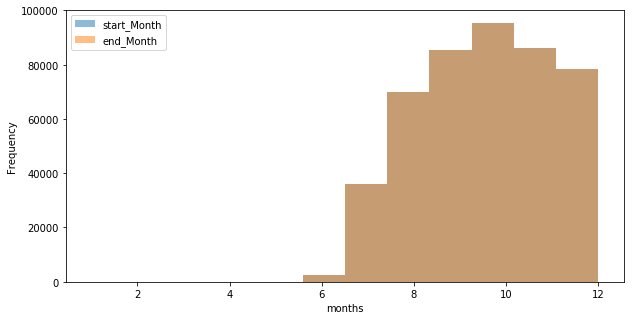

In [31]:
ax=bike[['start_Month', 'end_Month']].plot.hist(bins=12, alpha=0.5,figsize=(10,5))
plt.xlabel('months');

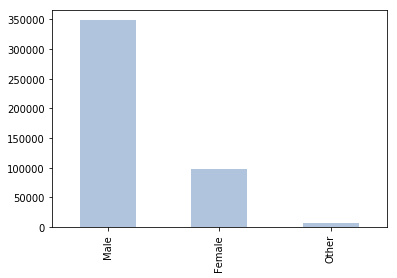

In [32]:
bike.member_gender.value_counts().plot(kind='bar',color='lightsteelblue');

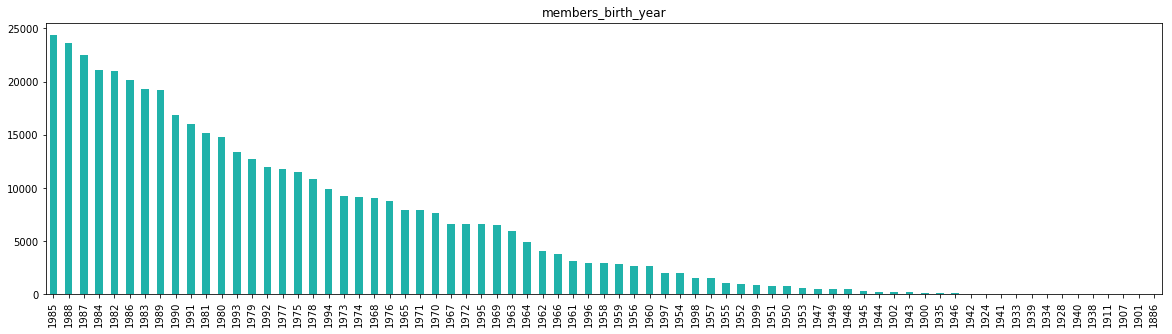

In [33]:
bike.member_birth_year.value_counts().plot(kind='bar',figsize=(20,5),color='lightseagreen',title='members_birth_year');

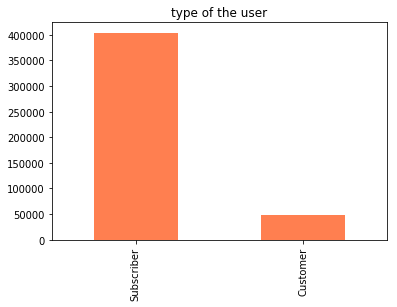

In [34]:
bike.user_type.value_counts().plot(kind='bar',color='coral',title='type of the user');

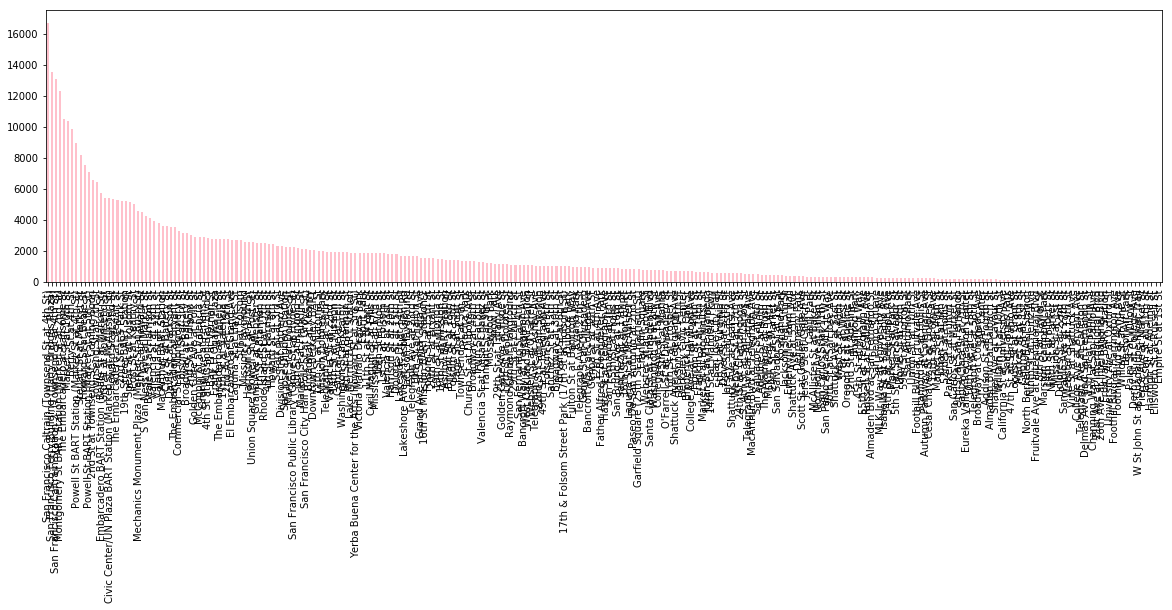

In [35]:
bike.end_station_name.value_counts().plot(kind='bar',figsize=(20,5),color='pink');

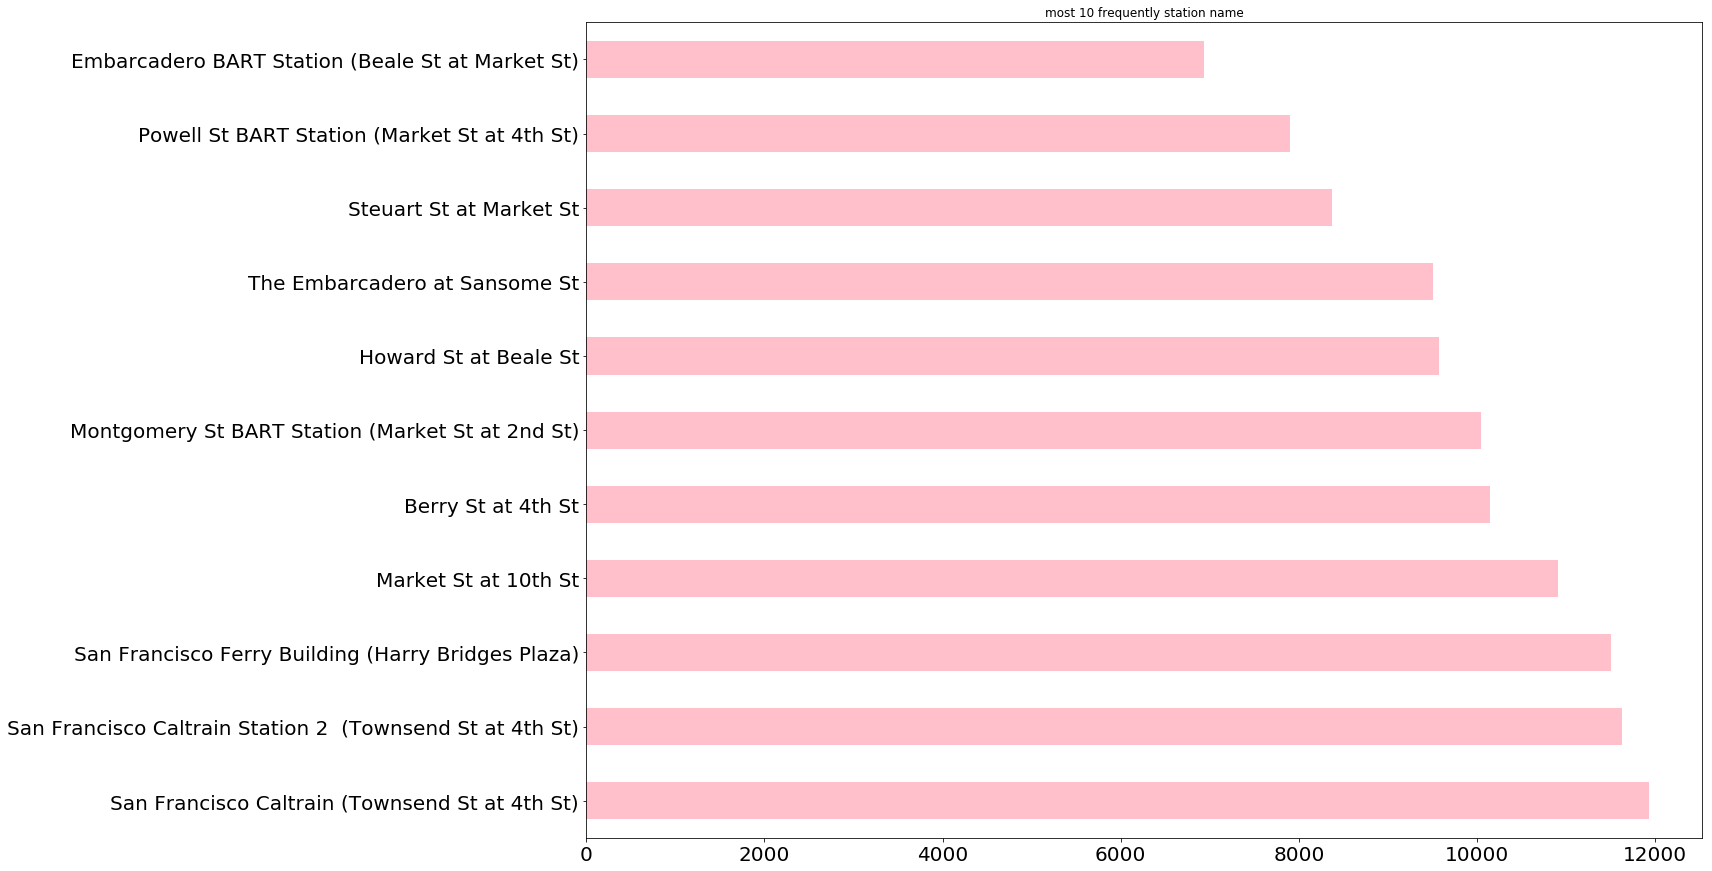

In [36]:
bike.start_station_name.value_counts()[:11].plot(kind='barh',figsize=(20,15),color='pink',fontsize=20,title="most 10 frequently station name");

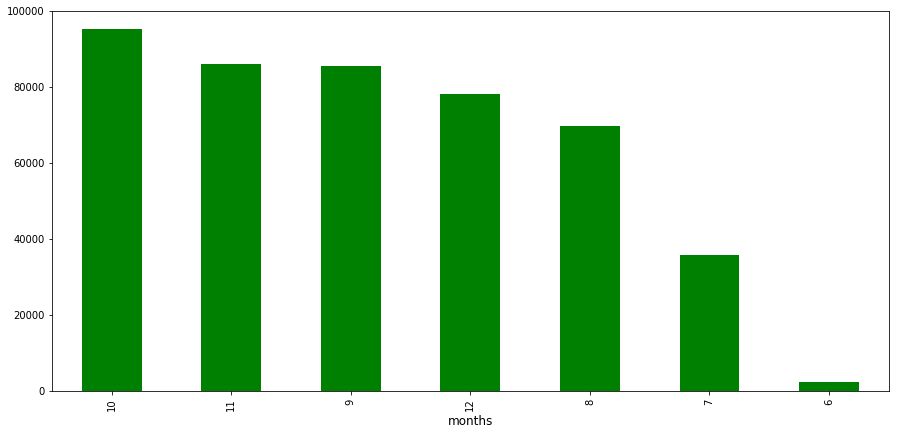

In [37]:
a=bike.start_Month.value_counts().plot(kind='bar',figsize=(15,7),color='green')
a.set_xlabel("months",fontsize=12);

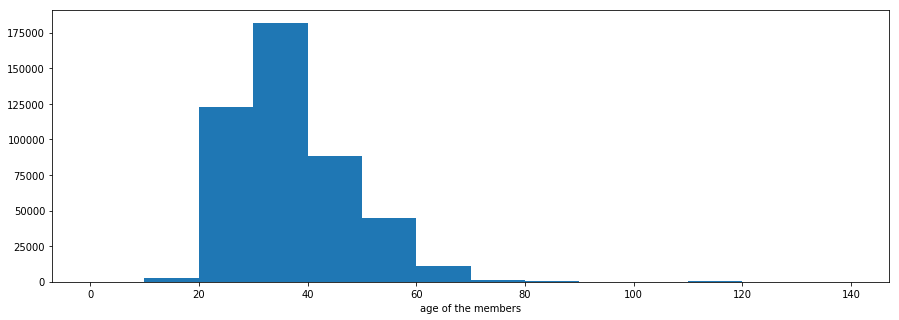

In [38]:
binsize = 10
bins = np.arange(0, bike['member_age'].max()+binsize, binsize)
plt.figure(figsize=[15, 5])
plt.hist(data = bike, x = 'member_age', bins = bins)
plt.xlabel('age of the members')
plt.show();

# Distribution of The age of the members
### the age of the members in the dataset takes a kind of skewed to the right,the peak around age 30-40 where the most of the members age.

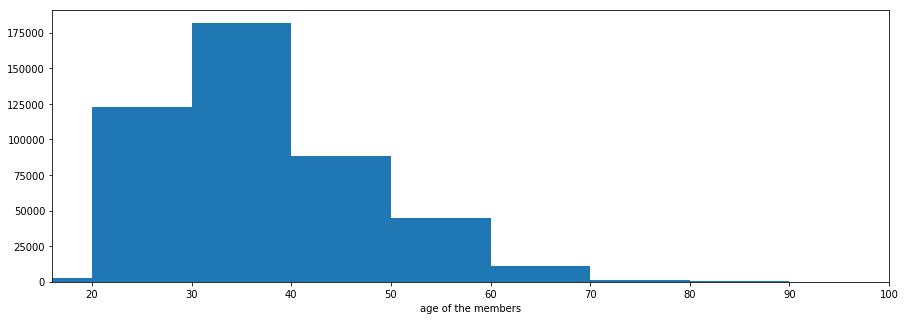

In [39]:
## duration_min histogram
binsize = 10
bins = np.arange(0, bike['member_age'].max()+binsize, binsize)
plt.figure(figsize=[15, 5])
plt.hist(data = bike, x = 'member_age', bins = bins)
plt.xlabel('age of the members')
plt.xlim([16,100])##add xlim to clear the visual
plt.show();

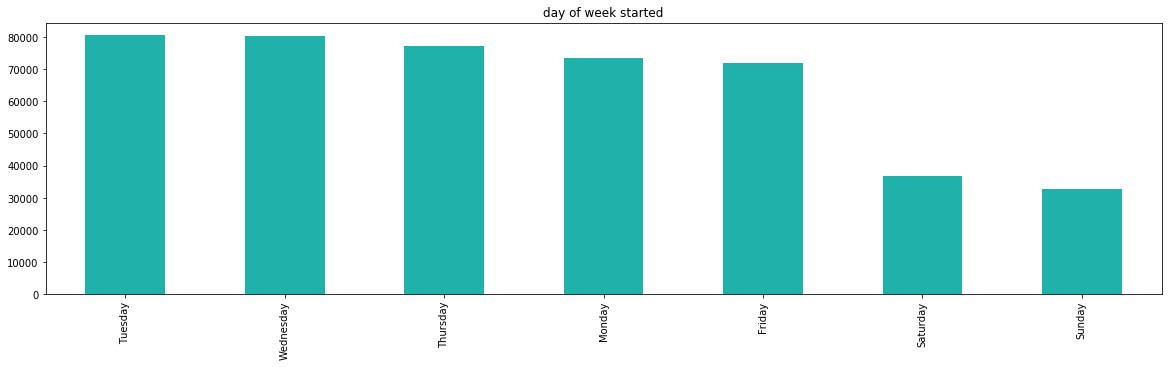

In [40]:
bike.day_of_week_start.value_counts().plot(kind='bar',figsize=(20,5),color='lightseagreen',title='day of week started');

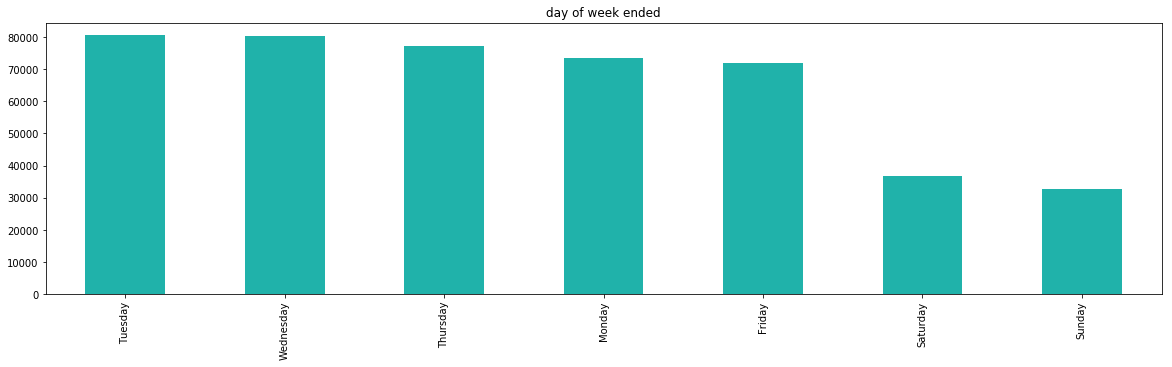

In [41]:
bike.day_of_week_end.value_counts().plot(kind='bar',figsize=(20,5),color='lightseagreen',title='day of week ended');

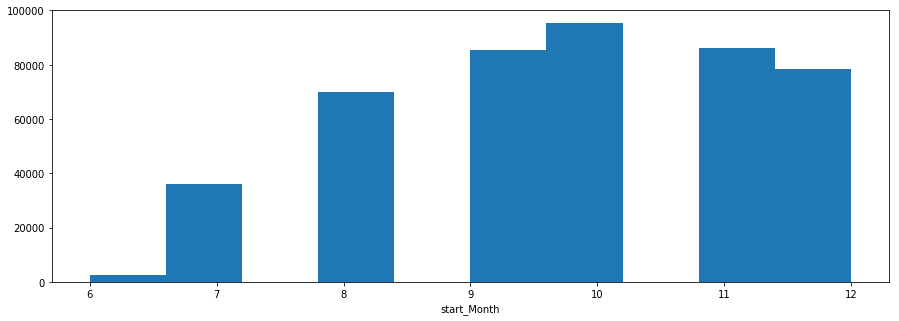

In [42]:
plt.figure(figsize=[15, 5])
plt.hist(data = bike, x = 'start_Month')
plt.xlabel('start_Month')
plt.show();

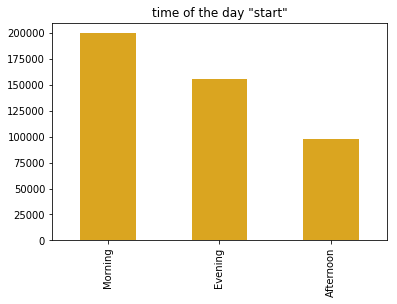

In [43]:
bike.timeOfDay_start.value_counts().plot(kind='bar',color='goldenrod',title='time of the day "start"');

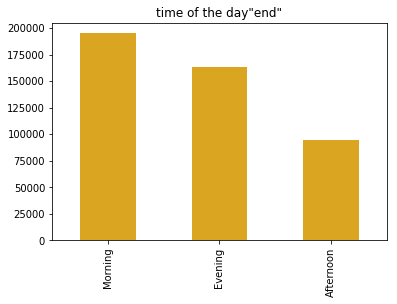

In [44]:
bike.timeOfDay_end.value_counts().plot(kind='bar',color='goldenrod',title='time of the day"end"');

# Distribution of the speed 
### speed is calculated based on distance traveled and time taken, the distribution is normal, most of the members range in speed between 2 to 4 m/s.

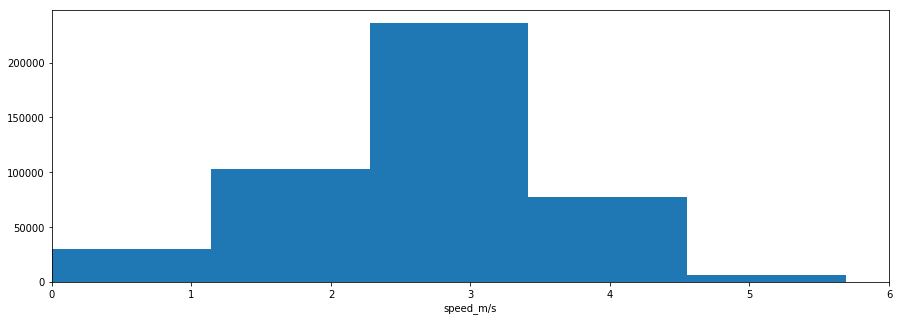

In [45]:
plt.figure(figsize=[15, 5])
plt.hist(data = bike, x = 'speed_m/s')
plt.xlabel('speed_m/s')
plt.xlim([0,6])
plt.show();

# Bivariate Exploration

# user type and the time of the day.
### the plot shows how many times the member started driving the bike at any time of the day, i can see that the most frequent time to start driving is "morning" for both subscriber and customer, maybe because this is the time to go to work.

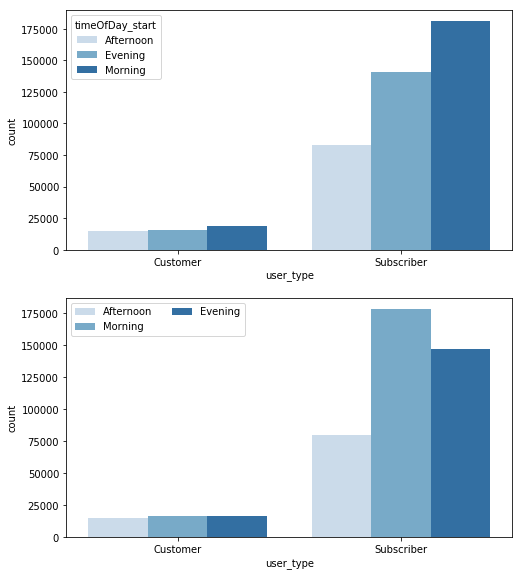

In [46]:
plt.figure(figsize = [8, 15])
plt.subplot(3, 1, 1)
sb.countplot(data = bike,x='user_type',hue='timeOfDay_start', palette = 'Blues')
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike,x='user_type',hue ='timeOfDay_end',palette = 'Blues')
ax.legend(ncol = 2)
plt.show()

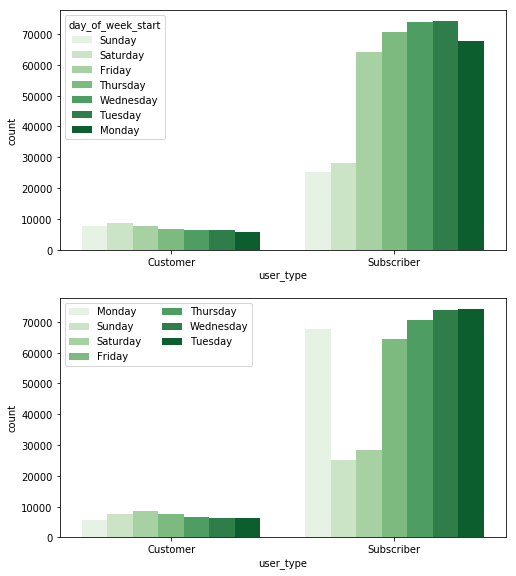

In [47]:
plt.figure(figsize = [8, 15])
plt.subplot(3, 1, 1)
sb.countplot(data = bike, x = 'user_type', hue = 'day_of_week_start', palette = 'Greens')
ax = plt.subplot(3, 1, 2)
sb.countplot(data = bike, x = 'user_type',hue = 'day_of_week_end', palette = 'Greens')
ax.legend(ncol = 2)
plt.show()

In [48]:
numeric_vars = ['duration_min', 'Distance_M','speed_m/s','member_age']
categoric_vars = ['member_gender', 'user_type', 'timeOfDay_start','day_of_week_start']

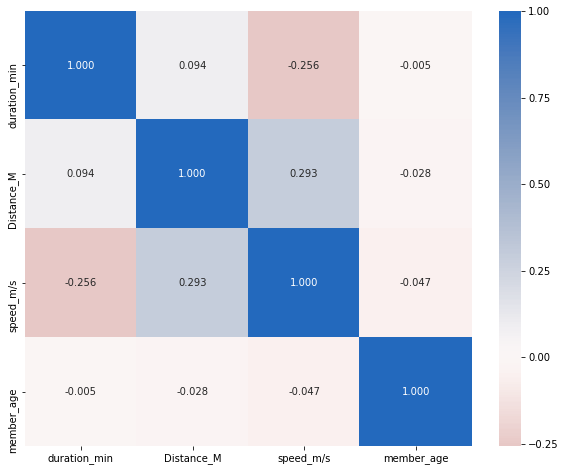

In [49]:
plt.figure(figsize = [10, 8])
sb.heatmap(bike[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

C:\Users\shahad\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\shahad\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


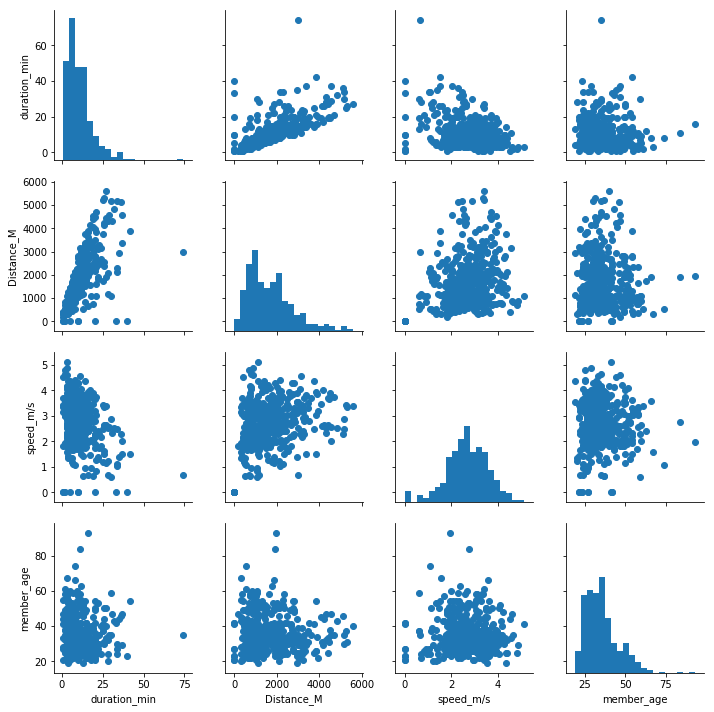

In [50]:
samples = np.random.choice(bike.shape[0], 500, replace = False)
bike_samp = bike.loc[samples,:]
p = sb.PairGrid(data = bike_samp, vars = numeric_vars)
p = p.map_diag(plt.hist, bins = 20);
p.map_offdiag(plt.scatter);

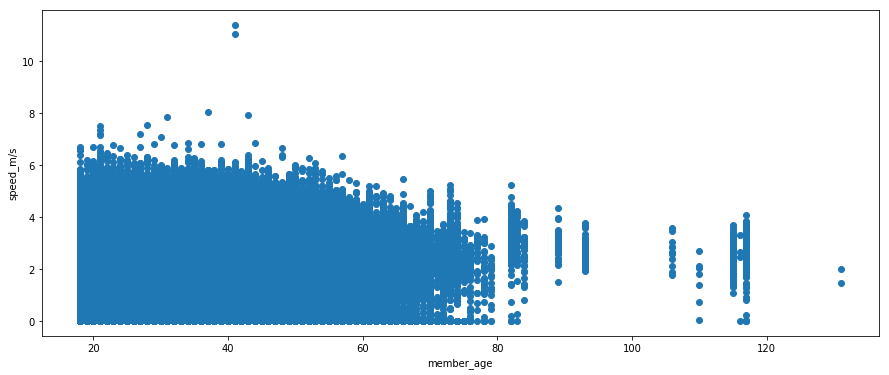

In [51]:
plt.figure(figsize = [15, 6])
plt.scatter(data = bike, x = 'member_age', y = 'speed_m/s')
plt.xlabel('member_age')
plt.ylabel('speed_m/s')
plt.show()

# The age of the member and the duration
### clearly there is no correlation between the age and the duration, so the age doesn't affect the duration of driving the bike.

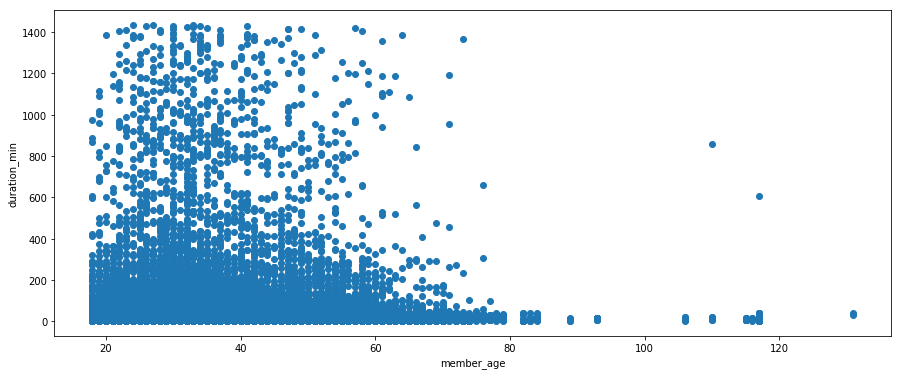

In [52]:
plt.figure(figsize = [15, 6])
plt.scatter(data = bike, x = 'member_age', y = 'duration_min')
plt.xlabel('member_age')
plt.ylabel('duration_min')
plt.show();

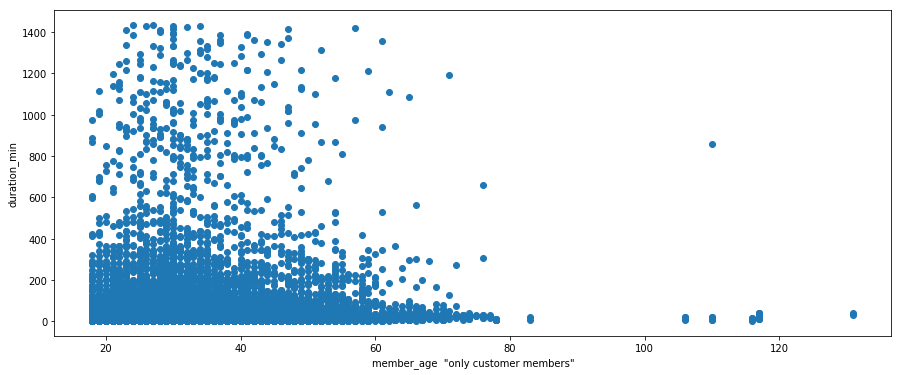

In [53]:
plt.figure(figsize = [15, 6])
plt.scatter(data = bike[bike['user_type']=='Customer'], x = 'member_age', y = 'duration_min')
plt.xlabel('member_age  "only customer members"')
plt.ylabel('duration_min')
plt.show()

# Multivariate Exploration

# The Duration and the Distance by user type and the day of the week
### We can see how the duration increases on saturday and sunday whether the member subscriber or customer, and the distance decreases on saturday and sunday "weekend",perhaps because of the traffic.

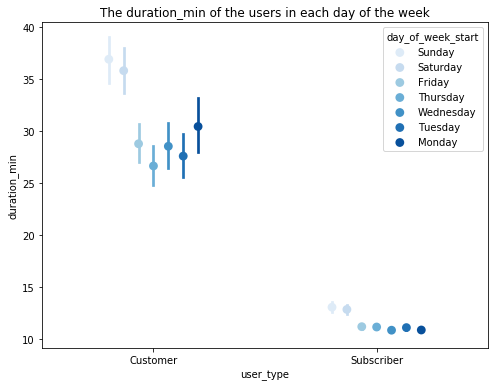

In [54]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x = 'user_type', y = 'duration_min', hue = 'day_of_week_start',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('The duration_min of the users in each day of the week')
plt.ylabel('duration_min')
ax.set_yticklabels([],minor = True)
plt.show();
#['member_gender', 'user_type', 'timeOfDay_start','day_of_week_start']

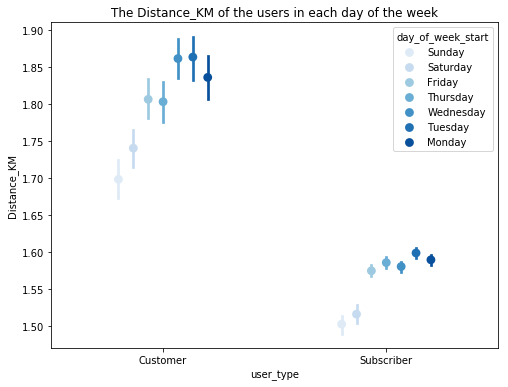

In [55]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x = 'user_type', y = 'Distance_KM', hue = 'day_of_week_start',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('The Distance_KM of the users in each day of the week')
plt.ylabel('Distance_KM')
ax.set_yticklabels([],minor = True)
plt.show();

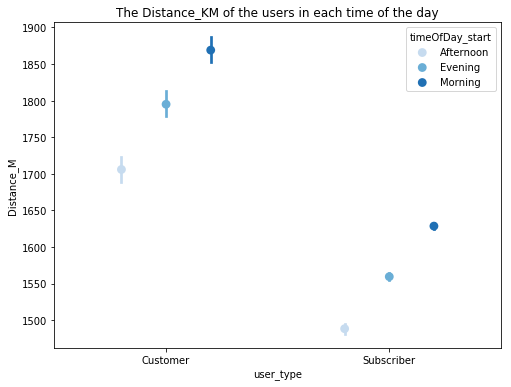

In [56]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x = 'user_type', y = 'Distance_M', hue = 'timeOfDay_start',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('The Distance_KM of the users in each time of the day')
plt.ylabel('Distance_M')
ax.set_yticklabels([],minor = True)
plt.show();

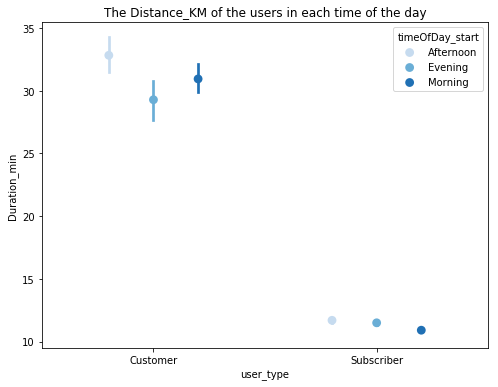

In [57]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x = 'user_type', y = 'duration_min', hue = 'timeOfDay_start',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('The Distance_KM of the users in each time of the day')
plt.ylabel('Duration_min')
ax.set_yticklabels([],minor = True)
plt.show();

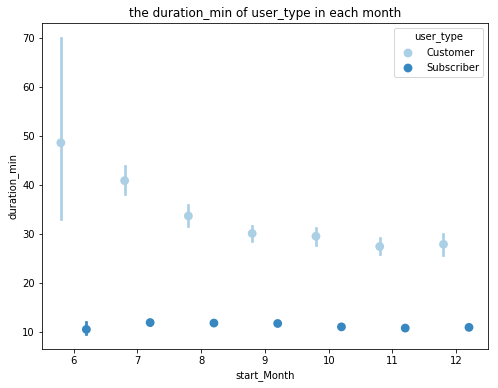

In [58]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, x = 'start_Month', y = 'duration_min', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('the duration_min of user_type in each month')
plt.ylabel('duration_min')
ax.set_yticklabels([],minor = True)
plt.show();

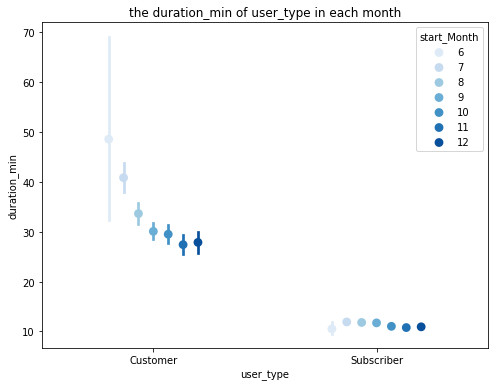

In [59]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike, hue = 'start_Month', y = 'duration_min', x = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('the duration_min of user_type in each month')
plt.ylabel('duration_min')
ax.set_yticklabels([],minor = True)
plt.show();

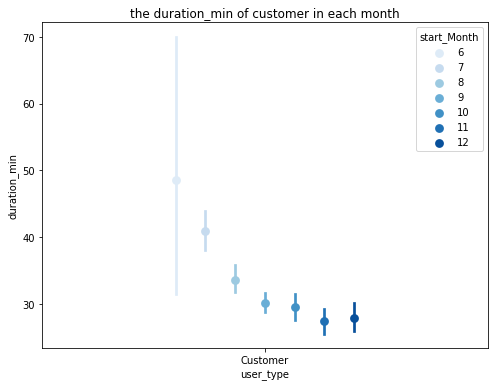

In [60]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = bike[bike['user_type']=='Customer'], hue = 'start_Month', y = 'duration_min', x = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('the duration_min of customer in each month')
plt.ylabel('duration_min')
ax.set_yticklabels([],minor = True)
plt.show();